## Visualiztaion of the ROA-size relation by Bi4/Non-Big 4

-------------------------

### Import libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)
import wrds

### Connect WRDS

In [48]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


------

### Load Compustat data (fyear= 2020)

In [49]:
df= conn.raw_sql(f"""select conm, gvkey, cik, fyear, at, sale, ni, au, sich
                    from comp.funda a
                    where a.fyear >= 2019 and 
                        a.fyear <= 2020 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C'
                    """)
df=df.dropna(subset=['cik', 'at', 'sale', 'sich', 'au'])
print(df.shape)
df.head()

(12786, 9)


,conm,gvkey,cik,fyear,at,sale,ni,au,sich
0,AAR CORP,001004,0000001750,2019.0,2079.000,2089.300,4.400,6,5080.0
2,AFA PROTECTIVE SYSTEMS INC,001019,0000002668,2019.0,33.355,83.088,2.201,7,7380.0
4,AMERICAN AIRLINES GROUP INC,001045,0000006201,2019.0,59995.000,45768.000,1686.000,6,4512.0
5,CECO ENVIRONMENTAL CORP,001050,0000003197,2019.0,408.637,341.869,17.707,11,3564.0
6,ASA GOLD AND PRECIOUS METALS,001062,0001230869,2019.0,286.612,2.371,91.431,9,6799.0


### Define variables

In [50]:
df=df[df['at']!= 0]
df['log_at']= np.log(1+df['at'])
df['sale_at']= df['sale'] / df['at']
df['lag_at']= df.groupby('gvkey')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']

df['au']=df['au'].astype(int)
df['big4']= 0
df.loc[(df.au >=4) & (df.au <= 7), 'big4']= 1
print(df.shape)
df.head()

(12756, 14)


,conm,gvkey,cik,fyear,at,sale,ni,au,sich,log_at,sale_at,lag_at,ROA,big4
0,AAR CORP,001004,0000001750,2019.0,2079.000,2089.300,4.400,6,5080.0,7.640123,1.004954,NaN,NaN,1
2,AFA PROTECTIVE SYSTEMS INC,001019,0000002668,2019.0,33.355,83.088,2.201,7,7380.0,3.536748,2.491021,NaN,NaN,1
4,AMERICAN AIRLINES GROUP INC,001045,0000006201,2019.0,59995.000,45768.000,1686.000,6,4512.0,11.002033,0.762864,NaN,NaN,1
5,CECO ENVIRONMENTAL CORP,001050,0000003197,2019.0,408.637,341.869,17.707,11,3564.0,6.015271,0.836608,NaN,NaN,0
6,ASA GOLD AND PRECIOUS METALS,001062,0001230869,2019.0,286.612,2.371,91.431,9,6799.0,5.661612,0.008273,NaN,NaN,0


In [51]:
# excluding financial firms
df= df[~( (df.sich>=6000)&(df.sich<7000) )]
df.shape

(10038, 14)

### Drop outliers

In [52]:
df= df[['ROA', 'log_at', 'sale_at', 'big4']]
df.dropna(how='any', inplace= True)
df=df[(df.ROA > -0.8) & (df.ROA < 0.5)]
df=df[(df.sale_at<3)]
print(df.shape)
df.head()

(4087, 4)


,ROA,log_at,sale_at,big4
11399,0.017220,7.339992,1.072547,1
11401,0.078039,3.727379,2.037934,1
11403,-0.148096,11.035035,0.279593,1
11404,0.020094,6.041002,0.753638,0
11407,0.029793,9.904558,0.179166,1


### Visualization - Scatterplot

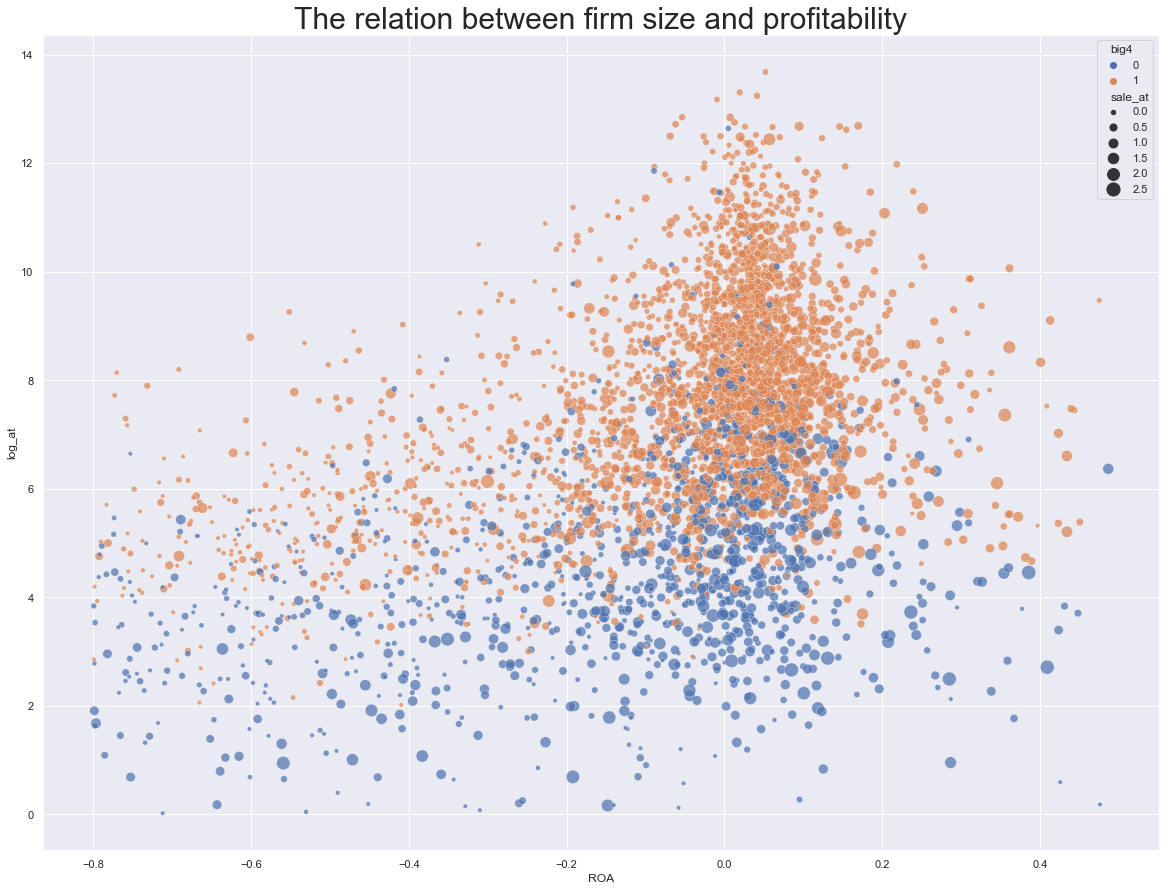

In [53]:
sns.set(rc={'figure.figsize':(20,15)})
p= sns.scatterplot(x=df['ROA'], y=df['log_at'], hue= df['big4'], size= df['sale_at'], sizes=(20,200), alpha=0.7)
p.set_title('The relation between firm size and profitability', fontsize = 30)
plt.show()

* The relation between firm size (log_at) and profitability (ROA)
* Blue circles: Big 4 clients
* Orange circles: Big 4 clients
* The size of circle: sale_at